# Liner regression with MCMC
### In this section, we describe parameter estimation with Markov chain Monre Carlo (MCMC) method. First, we would like to describe the MCMC method. The concept of MCMC is based on Bayes theorem.

In [2]:
import scipy.stats
from scipy.stats import norm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits

### We will male use of the data from COSMOS2015 field (Laigle et al. 2016). With fits.open(data.fits) function, we can open data.fits file. 

In [3]:
hdul_SFG = fits.open('data/SFG2.fits')
hdu_SFG = hdul_SFG[0].header
data_SFG = hdul_SFG[1].data
cols_SFG = hdul_SFG[1].columns
names_SFG = cols_SFG.names
form_SFG = cols_SFG.formats

In [4]:
mat_data_SFG = []
for i in range(len(form_SFG)):
    mat_data_SFG.append(data_SFG.field(i))

mat_data_SFG=np.array(mat_data_SFG).T
df_SFG = pd.DataFrame(mat_data_SFG, columns=names_SFG)
pd.set_option('display.max_columns',len(names_SFG))

df_SFG[names_SFG] = df_SFG[names_SFG].astype(float)

### With describe fucntion, we can summarise the statistics of the pandas data frame, such as mean, standard devitation and maximum & minimum value of the column. 

In [5]:
df_SFG=df_SFG[df_SFG["MASS_MED"]>9.]
df_SFG=df_SFG[np.log10(df_SFG["SFR"])>-1.]
df_SFG.describe()

,RAJ2000,DEJ2000,RAcdeg,DEcdeg,Sep,Pfalse,zbest,F3GHz,logL10cm,logL21cm,logLTIRSF,SFR,ALPHA_J2000,DELTA_J2000,X_IMAGE,Y_IMAGE,ERRX2_IMAGE,ERRY2_IMAGE,ERRXY_IMAGE,FLUX_RADIUS,KRON_RADIUS,EBV,Ks_FLUX_APER2,Ks_FLUXERR_APER2,Ks_FLUX_APER3,Ks_FLUXERR_APER3,Ks_MAG_APER2,Ks_MAGERR_APER2,Ks_MAG_APER3,Ks_MAGERR_APER3,Ks_MAG_AUTO,Ks_MAGERR_AUTO,Ks_MAG_ISO,Ks_MAGERR_ISO,Y_FLUX_APER2,Y_FLUXERR_APER2,Y_FLUX_APER3,Y_FLUXERR_APER3,Y_MAG_APER2,Y_MAGERR_APER2,Y_MAG_APER3,Y_MAGERR_APER3,Y_MAG_AUTO,Y_MAGERR_AUTO,Y_MAG_ISO,Y_MAGERR_ISO,H_FLUX_APER2,H_FLUXERR_APER2,H_FLUX_APER3,H_FLUXERR_APER3,H_MAG_APER2,H_MAGERR_APER2,H_MAG_APER3,H_MAGERR_APER3,H_MAG_AUTO,H_MAGERR_AUTO,H_MAG_ISO,H_MAGERR_ISO,J_FLUX_APER2,J_FLUXERR_APER2,J_FLUX_APER3,J_FLUXERR_APER3,J_MAG_APER2,J_MAGERR_APER2,J_MAG_APER3,J_MAGERR_APER3,J_MAG_AUTO,J_MAGERR_AUTO,J_MAG_ISO,J_MAGERR_ISO,B_FLUX_APER2,B_FLUXERR_APER2,B_FLUX_APER3,B_FLUXERR_APER3,B_MAG_APER2,B_MAGERR_APER2,B_MAG_APER3,B_MAGERR_APER3,B_MAG_AUTO,B_MAGERR_AUTO,B_MAG_ISO,B_MAGERR_ISO,V_FLUX_APER2,V_FLUXERR_APER2,V_FLUX_APER3,V_FLUXERR_APER3,V_MAG_APER2,V_MAGERR_APER2,V_MAG_APER3,V_MAGERR_APER3,V_MAG_AUTO,V_MAGERR_AUTO,V_MAG_ISO,V_MAGERR_ISO,ip_FLUX_APER2,ip_FLUXERR_APER2,ip_FLUX_APER3,ip_FLUXERR_APER3,ip_MAG_APER2,ip_MAGERR_APER2,ip_MAG_APER3,ip_MAGERR_APER3,ip_MAG_AUTO,ip_MAGERR_AUTO,ip_MAG_ISO,ip_MAGERR_ISO,r_FLUX_APER2,r_FLUXERR_APER2,r_FLUX_APER3,r_FLUXERR_APER3,r_MAG_APER2,r_MAGERR_APER2,r_MAG_APER3,r_MAGERR_APER3,r_MAG_AUTO,r_MAGERR_AUTO,r_MAG_ISO,r_MAGERR_ISO,u_FLUX_APER2,u_FLUXERR_APER2,u_FLUX_APER3,u_FLUXERR_APER3,u_MAG_APER2,u_MAGERR_APER2,u_MAG_APER3,u_MAGERR_APER3,u_MAG_AUTO,u_MAGERR_AUTO,u_MAG_ISO,u_MAGERR_ISO,zp_FLUX_APER2,zp_FLUXERR_APER2,zp_FLUX_APER3,zp_FLUXERR_APER3,zp_MAG_APER2,zp_MAGERR_APER2,zp_MAG_APER3,zp_MAGERR_APER3,zp_MAG_AUTO,zp_MAGERR_AUTO,zp_MAG_ISO,zp_MAGERR_ISO,zpp_FLUX_APER2,zpp_FLUXERR_APER2,zpp_FLUX_APER3,zpp_FLUXERR_APER3,zpp_MAG_APER2,zpp_MAGERR_APER2,zpp_MAG_APER3,zpp_MAGERR_APER3,zpp_MAG_AUTO,zpp_MAGERR_AUTO,zpp_MAG_ISO,zpp_MAGERR_ISO,IA484_FLUX_APER2,IA484_FLUXERR_APER2,IA484_FLUX_APER3,IA484_FLUXERR_APER3,IA484_MAG_APER2,IA484_MAGERR_APER2,IA484_MAG_APER3,IA484_MAGERR_APER3,IA484_MAG_AUTO,IA484_MAGERR_AUTO,IA484_MAG_ISO,IA484_MAGERR_ISO,IA527_FLUX_APER2,IA527_FLUXERR_APER2,IA527_FLUX_APER3,IA527_FLUXERR_APER3,IA527_MAG_APER2,IA527_MAGERR_APER2,IA527_MAG_APER3,IA527_MAGERR_APER3,IA527_MAG_AUTO,IA527_MAGERR_AUTO,IA527_MAG_ISO,IA527_MAGERR_ISO,IA624_FLUX_APER2,IA624_FLUXERR_APER2,IA624_FLUX_APER3,IA624_FLUXERR_APER3,IA624_MAG_APER2,IA624_MAGERR_APER2,IA624_MAG_APER3,IA624_MAGERR_APER3,IA624_MAG_AUTO,IA624_MAGERR_AUTO,IA624_MAG_ISO,IA624_MAGERR_ISO,IA679_FLUX_APER2,IA679_FLUXERR_APER2,IA679_FLUX_APER3,IA679_FLUXERR_APER3,IA679_MAG_APER2,IA679_MAGERR_APER2,IA679_MAG_APER3,IA679_MAGERR_APER3,IA679_MAG_AUTO,IA679_MAGERR_AUTO,IA679_MAG_ISO,IA679_MAGERR_ISO,IA738_FLUX_APER2,IA738_FLUXERR_APER2,IA738_FLUX_APER3,IA738_FLUXERR_APER3,IA738_MAG_APER2,IA738_MAGERR_APER2,IA738_MAG_APER3,IA738_MAGERR_APER3,IA738_MAG_AUTO,IA738_MAGERR_AUTO,IA738_MAG_ISO,IA738_MAGERR_ISO,IA767_FLUX_APER2,IA767_FLUXERR_APER2,IA767_FLUX_APER3,IA767_FLUXERR_APER3,IA767_MAG_APER2,IA767_MAGERR_APER2,IA767_MAG_APER3,IA767_MAGERR_APER3,IA767_MAG_AUTO,IA767_MAGERR_AUTO,IA767_MAG_ISO,IA767_MAGERR_ISO,IB427_FLUX_APER2,IB427_FLUXERR_APER2,IB427_FLUX_APER3,IB427_FLUXERR_APER3,IB427_MAG_APER2,IB427_MAGERR_APER2,IB427_MAG_APER3,IB427_MAGERR_APER3,IB427_MAG_AUTO,IB427_MAGERR_AUTO,IB427_MAG_ISO,IB427_MAGERR_ISO,IB464_FLUX_APER2,IB464_FLUXERR_APER2,IB464_FLUX_APER3,IB464_FLUXERR_APER3,IB464_MAG_APER2,IB464_MAGERR_APER2,IB464_MAG_APER3,IB464_MAGERR_APER3,IB464_MAG_AUTO,IB464_MAGERR_AUTO,IB464_MAG_ISO,IB464_MAGERR_ISO,IB505_FLUX_APER2,IB505_FLUXERR_APER2,IB505_FLUX_APER3,IB505_FLUXERR_APER3,IB505_MAG_APER2,IB505_MAGERR_APER2,IB505_MAG_APER3,IB505_MAGERR_APER3,IB505_MAG_AUTO,IB505_MAGERR_AUTO,IB505_MAG_ISO,IB505_MAGERR_ISO,IB574_FLUX_APER2,IB574_FLUXERR_APER2,IB574_FLUX_APER3,IB574_FLUXERR_APER3,IB574_MAG_APER2,IB574_MAGERR_APER2,IB574_MAG

In [6]:
display(df_SFG.head())

,RAJ2000,DEJ2000,RAcdeg,DEcdeg,Sep,Pfalse,zbest,F3GHz,logL10cm,logL21cm,logLTIRSF,SFR,ALPHA_J2000,DELTA_J2000,X_IMAGE,Y_IMAGE,ERRX2_IMAGE,ERRY2_IMAGE,ERRXY_IMAGE,FLUX_RADIUS,KRON_RADIUS,EBV,Ks_FLUX_APER2,Ks_FLUXERR_APER2,Ks_FLUX_APER3,Ks_FLUXERR_APER3,Ks_MAG_APER2,Ks_MAGERR_APER2,Ks_MAG_APER3,Ks_MAGERR_APER3,Ks_MAG_AUTO,Ks_MAGERR_AUTO,Ks_MAG_ISO,Ks_MAGERR_ISO,Y_FLUX_APER2,Y_FLUXERR_APER2,Y_FLUX_APER3,Y_FLUXERR_APER3,Y_MAG_APER2,Y_MAGERR_APER2,Y_MAG_APER3,Y_MAGERR_APER3,Y_MAG_AUTO,Y_MAGERR_AUTO,Y_MAG_ISO,Y_MAGERR_ISO,H_FLUX_APER2,H_FLUXERR_APER2,H_FLUX_APER3,H_FLUXERR_APER3,H_MAG_APER2,H_MAGERR_APER2,H_MAG_APER3,H_MAGERR_APER3,H_MAG_AUTO,H_MAGERR_AUTO,H_MAG_ISO,H_MAGERR_ISO,J_FLUX_APER2,J_FLUXERR_APER2,J_FLUX_APER3,J_FLUXERR_APER3,J_MAG_APER2,J_MAGERR_APER2,J_MAG_APER3,J_MAGERR_APER3,J_MAG_AUTO,J_MAGERR_AUTO,J_MAG_ISO,J_MAGERR_ISO,B_FLUX_APER2,B_FLUXERR_APER2,B_FLUX_APER3,B_FLUXERR_APER3,B_MAG_APER2,B_MAGERR_APER2,B_MAG_APER3,B_MAGERR_APER3,B_MAG_AUTO,B_MAGERR_AUTO,B_MAG_ISO,B_MAGERR_ISO,V_FLUX_APER2,V_FLUXERR_APER2,V_FLUX_APER3,V_FLUXERR_APER3,V_MAG_APER2,V_MAGERR_APER2,V_MAG_APER3,V_MAGERR_APER3,V_MAG_AUTO,V_MAGERR_AUTO,V_MAG_ISO,V_MAGERR_ISO,ip_FLUX_APER2,ip_FLUXERR_APER2,ip_FLUX_APER3,ip_FLUXERR_APER3,ip_MAG_APER2,ip_MAGERR_APER2,ip_MAG_APER3,ip_MAGERR_APER3,ip_MAG_AUTO,ip_MAGERR_AUTO,ip_MAG_ISO,ip_MAGERR_ISO,r_FLUX_APER2,r_FLUXERR_APER2,r_FLUX_APER3,r_FLUXERR_APER3,r_MAG_APER2,r_MAGERR_APER2,r_MAG_APER3,r_MAGERR_APER3,r_MAG_AUTO,r_MAGERR_AUTO,r_MAG_ISO,r_MAGERR_ISO,u_FLUX_APER2,u_FLUXERR_APER2,u_FLUX_APER3,u_FLUXERR_APER3,u_MAG_APER2,u_MAGERR_APER2,u_MAG_APER3,u_MAGERR_APER3,u_MAG_AUTO,u_MAGERR_AUTO,u_MAG_ISO,u_MAGERR_ISO,zp_FLUX_APER2,zp_FLUXERR_APER2,zp_FLUX_APER3,zp_FLUXERR_APER3,zp_MAG_APER2,zp_MAGERR_APER2,zp_MAG_APER3,zp_MAGERR_APER3,zp_MAG_AUTO,zp_MAGERR_AUTO,zp_MAG_ISO,zp_MAGERR_ISO,zpp_FLUX_APER2,zpp_FLUXERR_APER2,zpp_FLUX_APER3,zpp_FLUXERR_APER3,zpp_MAG_APER2,zpp_MAGERR_APER2,zpp_MAG_APER3,zpp_MAGERR_APER3,zpp_MAG_AUTO,zpp_MAGERR_AUTO,zpp_MAG_ISO,zpp_MAGERR_ISO,IA484_FLUX_APER2,IA484_FLUXERR_APER2,IA484_FLUX_APER3,IA484_FLUXERR_APER3,IA484_MAG_APER2,IA484_MAGERR_APER2,IA484_MAG_APER3,IA484_MAGERR_APER3,IA484_MAG_AUTO,IA484_MAGERR_AUTO,IA484_MAG_ISO,IA484_MAGERR_ISO,IA527_FLUX_APER2,IA527_FLUXERR_APER2,IA527_FLUX_APER3,IA527_FLUXERR_APER3,IA527_MAG_APER2,IA527_MAGERR_APER2,IA527_MAG_APER3,IA527_MAGERR_APER3,IA527_MAG_AUTO,IA527_MAGERR_AUTO,IA527_MAG_ISO,IA527_MAGERR_ISO,IA624_FLUX_APER2,IA624_FLUXERR_APER2,IA624_FLUX_APER3,IA624_FLUXERR_APER3,IA624_MAG_APER2,IA624_MAGERR_APER2,IA624_MAG_APER3,IA624_MAGERR_APER3,IA624_MAG_AUTO,IA624_MAGERR_AUTO,IA624_MAG_ISO,IA624_MAGERR_ISO,IA679_FLUX_APER2,IA679_FLUXERR_APER2,IA679_FLUX_APER3,IA679_FLUXERR_APER3,IA679_MAG_APER2,IA679_MAGERR_APER2,IA679_MAG_APER3,IA679_MAGERR_APER3,IA679_MAG_AUTO,IA679_MAGERR_AUTO,IA679_MAG_ISO,IA679_MAGERR_ISO,IA738_FLUX_APER2,IA738_FLUXERR_APER2,IA738_FLUX_APER3,IA738_FLUXERR_APER3,IA738_MAG_APER2,IA738_MAGERR_APER2,IA738_MAG_APER3,IA738_MAGERR_APER3,IA738_MAG_AUTO,IA738_MAGERR_AUTO,IA738_MAG_ISO,IA738_MAGERR_ISO,IA767_FLUX_APER2,IA767_FLUXERR_APER2,IA767_FLUX_APER3,IA767_FLUXERR_APER3,IA767_MAG_APER2,IA767_MAGERR_APER2,IA767_MAG_APER3,IA767_MAGERR_APER3,IA767_MAG_AUTO,IA767_MAGERR_AUTO,IA767_MAG_ISO,IA767_MAGERR_ISO,IB427_FLUX_APER2,IB427_FLUXERR_APER2,IB427_FLUX_APER3,IB427_FLUXERR_APER3,IB427_MAG_APER2,IB427_MAGERR_APER2,IB427_MAG_APER3,IB427_MAGERR_APER3,IB427_MAG_AUTO,IB427_MAGERR_AUTO,IB427_MAG_ISO,IB427_MAGERR_ISO,IB464_FLUX_APER2,IB464_FLUXERR_APER2,IB464_FLUX_APER3,IB464_FLUXERR_APER3,IB464_MAG_APER2,IB464_MAGERR_APER2,IB464_MAG_APER3,IB464_MAGERR_APER3,IB464_MAG_AUTO,IB464_MAGERR_AUTO,IB464_MAG_ISO,IB464_MAGERR_ISO,IB505_FLUX_APER2,IB505_FLUXERR_APER2,IB505_FLUX_APER3,IB505_FLUXERR_APER3,IB505_MAG_APER2,IB505_MAGERR_APER2,IB505_MAG_APER3,IB505_MAGERR_APER3,IB505_MAG_AUTO,IB505_MAGERR_AUTO,IB505_MAG_ISO,IB505_MAGERR_ISO,IB574_FLUX_APER2,IB574_FLUXERR_APER2,IB574_FLUX_APER3,IB574_FLUXERR_APER3,IB574_MAG_APER2,IB574_MAGERR_APER2,IB574_MAG

Here, 
The distiburion of $M_*{\mbox -}L_K$ seems to be able to described as a liner relation with two parameters $a$ and $b$ which correspond to slope and intercept respectively.
$$
\log (M_*/M_{\odot})=a\log(L_K)+b
$$
The aim of this lecture is to detrmine these two parameters and their distribution with MCMC method.

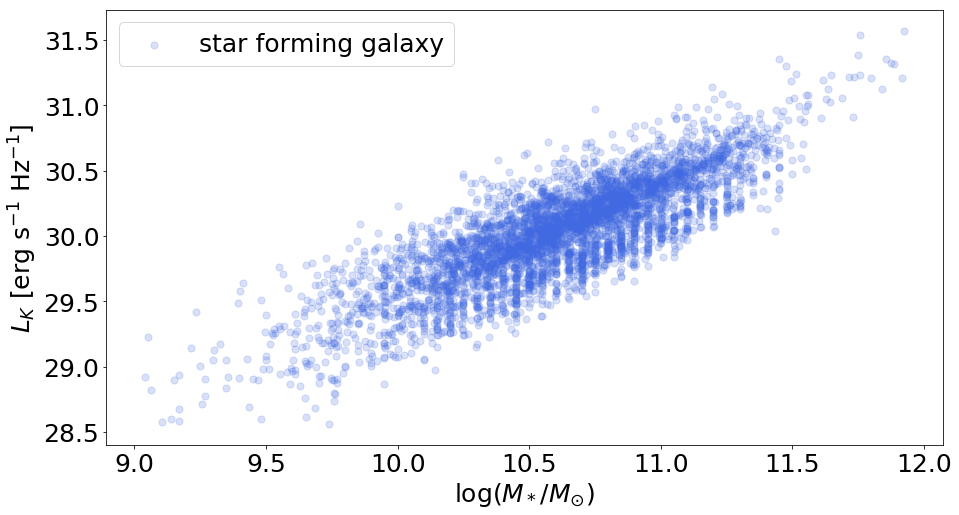

In [53]:
plt.figure(figsize=(15,8))
plt.rcParams["font.size"] = 25
# plt.scatter(df_SFG["MASS_MED"],np.log10(df_SFG["SFR"]),s=50,marker='o',color="b",alpha=0.2,label="star forming galaxy")
plt.scatter(df_SFG["MASS_MED"],df_SFG["L_K"],s=50,marker='o',color="royalblue",alpha=0.2,label="star forming galaxy")

plt.ylabel(r"$L_K$ $[{\rm erg\ s^{-1}\ Hz^{-1}}]$")
plt.xlabel("$\log (M_*/M_{\odot})$")
plt.legend(loc='upper left')

plt.show()

Fisrtly, we need to assume a prior distribution of parameters.
In this lecture, we assume that the prior distribution of intercept and slope is normal distribution with mean $\mu=0.5$ and standard deviation $\sigma=0.5$.
$$
\mathcal{N}(\mu,\sigma)=\frac{1}{\sqrt{2\pi \sigma^2}}\exp{\biggl(-\frac{(x-\mu)^2}{2\sigma^2}\biggr)}
$$

In [19]:
def prior_probability(theta):
    a = theta[0]     # intercept
    b = theta[1]     # slope
    a_prior = scipy.stats.norm(0.5, 0.5).pdf(a)
    b_prior = scipy.stats.norm(0.5, 0.5).pdf(b)
    return np.log(a) + np.log(b)

The data is assumed to have normal disribution. Therefore the likelihood fucntion is obtained as below. To avoid underflow, the log-likelihood is often used. 

In [20]:
def likelihood_probability(theta):
    a = theta[0]     # intercept
    b = theta[1]     # slope
    y_predict = a  + b * df_SFG["MASS_MED"]
#     likelihoods = scipy.stats.norm(y_predict, sigma_e).pdf(np.log10(df_SFG["SFR"])) 
    likelihoods = scipy.stats.norm(y_predict, sigma_e).pdf(df_SFG["L_K"]) 
    return np.sum(np.log(likelihoods))

The posterior distribution for each step can be calculated from likelihood probability and prior probability.

In [21]:
def posterior_probability(theta):
    return likelihood_probability(theta) + prior_probability(theta)

In [22]:
def proposal_function(theta):
    a = theta[0]
    b = theta[1]
    a_new = np.random.normal(a, 0.5)
    b_new = np.random.normal(b, 0.5)
    theta_new = [a_new, b_new]
    return theta_new

This part gives initial condistion of the Markov chain.  Here, $(a^{(0)},b^{(0)})=(0.5,0.5)$.

In [25]:
sigma_e=3.
N_iteration=50000           # the number of the iteration
theta_0 = [0.5, 0.5]        # start value
results = np.zeros([N_iteration,2])         
results[0,0] = theta_0[0]
results[0, 1] = theta_0[1]

This is a sampling part. In each step of Markov chain, we adopt Mertopolis-Hastings (MH) algorithm. The MH algorithm is defined as below,
>Step1. Determine the initial value of parameter $\theta^{(0)}$. Here, ${\bf \theta}^{(0)}=(0.5,0.5)$ this time.

>Step2. Calculate the acceptance probability $\alpha$.
$$
\alpha(\theta^{(t-1)},\tilde{\theta}) = \min{\biggl\{1,\frac{q(\tilde{\theta}|\theta^{(t-1)})}{q(\theta^{(t-1)}|\tilde{\theta})}\frac{p(\tilde{\theta})}{p(\theta^{(t-1)})} \biggr\}}
$$

>Step3. Generate a random number with a uniform distribution, $U \in [0,1]$.

>Step4. The parameter for next step is determined from 
$$
\theta^{(t)}= \begin{cases}
\tilde{\theta} & (U \leq \alpha(\theta^{(t-1)},\tilde{\theta}) \\
\theta^{(t-1)} & (U>\alpha(\theta^{(t-1)},\tilde{\theta})).
\end{cases}
$$

>Step5. Repeat step 2, 3, 4 and obtain parameters $\theta^{0},\ \theta^{(1)},...$

This part takes about 10 minutes...

In [26]:
for step in range(1, N_iteration):               

    theta_old = results[step-1, :]
    theta_proposal = proposal_function(beta_old)

    prob = np.exp(posterior_probability(theta_proposal) - posterior_probability(theta_old))

    if np.random.uniform(0,1) < prob:
        results[step, :] = theta_proposal    
    else:
        results[step, :] = theta_old         

C:\Users\keine\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


In the Markov chain sampling, the chain is assumed to converge to an invariant distribution. A distirbution $\bar{p}$ is an invariant distribution of transition distirbution $Q(\theta,\tilde{\theta})$ when
$$
\bar{p}(\tilde{\theta})=\int^{\infty}_{\infty} \bar{p}(\theta)Q(\theta,\tilde{\theta}).
$$
Particulary, the posterior probability $p(\theta|D)$ need to be an invariant distribution for a Markov chain. Therefore, the first several steps are to be throw out since they are not still an invariant distribution. This process is called **burn-in**. We can set the number of the steps to be throw out in the box below. A small number may cause to accept posterior distribution that is not converge to an invariant distribution.

In [31]:
burn_in = 1000
theta_posterior = results[burn_in:, :]
print(theta_posterior.mean(axis=0))        

[21.99895405  0.75695921]


In [33]:
mean = theta_posterior.mean(axis=0)
variance = theta_posterior.var(axis=0)
sigma = np.sqrt(theta_posterior.mean(axis=0))

[22.507188   22.507188   22.507188   ... 21.42575024 21.42575024
 21.42575024]


The final distribution of the two parameters are displayed as histograms.

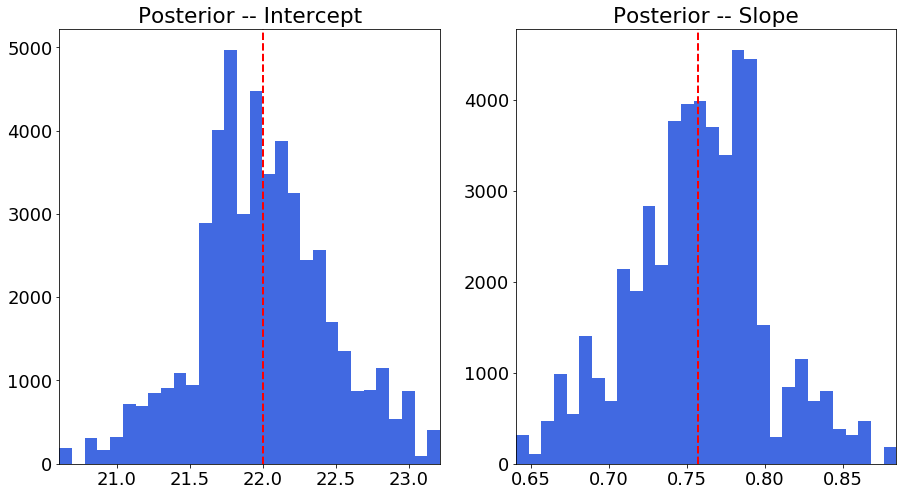

In [55]:
x_plot=np.linspace(0.,100.,1000)
fig = plt.figure(figsize=(15,8))
plt.rcParams["font.size"] = 18
ax1 = fig.add_subplot(121)
ax1.hist(theta_posterior[:,0], bins=30, color='royalblue')
ax1.axvline(theta_posterior.mean(axis=0)[0], color='red', linestyle='dashed', linewidth=2)
ax1.title.set_text('Posterior -- Intercept')
ax1.set_xlim(np.min(theta_posterior.T[0]),np.max(theta_posterior.T[0]))
ax2 = fig.add_subplot(122)
ax2.hist(theta_posterior[:,1], bins=30, color='royalblue')
ax2.axvline(theta_posterior.mean(axis=0)[1], color='red', linestyle='dashed', linewidth=2)
ax2.title.set_text('Posterior -- Slope')
ax2.set_xlim(np.min(theta_posterior.T[1]),np.max(theta_posterior.T[1]))
plt.show()

Finally, we can confirm that the model line with obtained parameters represents the original data distribution.

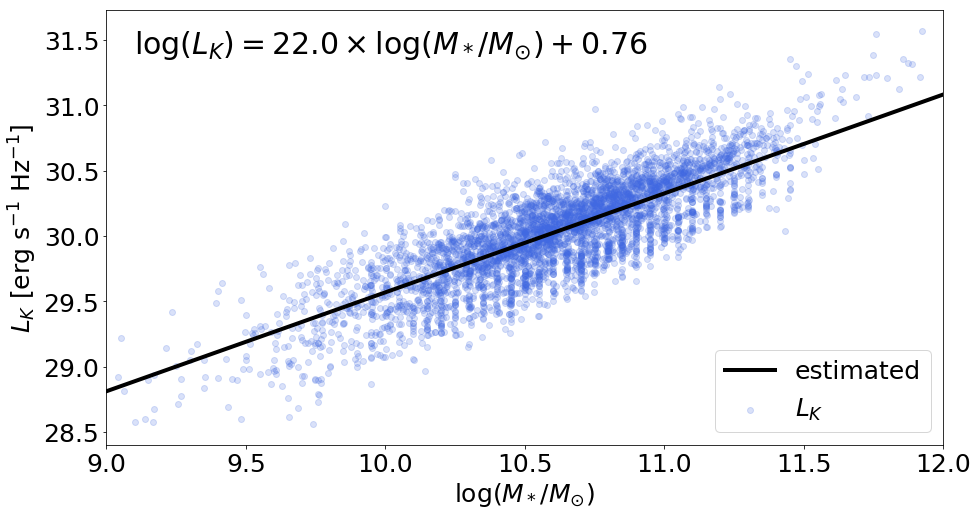

In [56]:
fig = plt.figure(figsize=(15,8))
x_plot=np.linspace(9.,12.,100)
plt.rcParams["font.size"] = 25
plt.scatter(df_SFG["MASS_MED"], df_SFG["L_K"], color='royalblue',alpha=0.2,label='$L_K$')
# plt.scatter(df_SFG["MASS_MED"], np.log10(df_SFG["SFR"]), color='blue',alpha=0.2)
plt.plot(x_plot,theta_posterior.mean(axis=0)[1]*x_plot+theta_posterior.mean(axis=0)[0],lw=4,color='k',label='estimated')
plt.legend(loc='lower right')
plt.text(9.1,31.4,r"$\log{(L_K)}=%01.1f \times \log{(M_*/M_{\odot})}+%01.2f$"%(theta_posterior.mean(axis=0)[0],theta_posterior.mean(axis=0)[1]),size=30)
plt.ylabel(r"$L_K$ $[{\rm erg\ s^{-1}\ Hz^{-1}}]$")
plt.xlabel("$\log (M_*/M_{\odot})$")
plt.xlim(9.,12)
# plt.ylim(-1.,4)
plt.show()